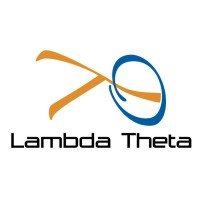

In [33]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [24]:
df=pd.read_csv(r"C:\Users\ehtis\OneDrive\Desktop\SALES FORCAASTING\dataset_five.csv")

In [25]:
df.shape

(50, 15)

In [9]:
X.shape

(50, 14)

In [27]:
df = pd.get_dummies(df, columns=['Product'], drop_first=True)

In [28]:
y = df['Output']
X = df.drop('Output', axis=1)

In [29]:
X.columns

Index(['Season', 'Location', 'Competetion_in_Market', 'Marketing',
       'Consumer_Bahviour', 'Discounted_price', 'Product_Quality',
       'Product_Availability', 'Probabilty_of_sale', 'Recession',
       'Self_location', 'No_of_shelf', 'Essential_product',
       'Product_Medicines ', 'Product_Milk', 'Product_Sugar',
       'Product_candies'],
      dtype='object')

In [55]:
X.head(10)

,Season,Location,Competetion_in_Market,Marketing,Consumer_Bahviour,Discounted_price,Product_Quality,Product_Availability,Probabilty_of_sale,Recession,Self_location,No_of_shelf,Essential_product,Product_Medicines,Product_Milk,Product_Sugar,Product_candies
0,1,1.0,1,1,0,0.5,1,1.0,1,1,1.0,0.3,1.0,0,0,0,0
1,0,0.5,1,1,0,0.1,1,1.0,0,1,1.0,0.1,0.0,0,0,0,0
2,1,0.0,1,1,0,0.2,1,1.0,0,1,1.0,0.2,0.0,0,0,0,0
3,1,1.0,1,1,0,0.4,1,1.0,0,1,0.5,0.4,0.0,0,0,0,0
4,1,1.0,1,1,1,0.3,1,1.0,1,1,0.0,0.2,0.0,0,0,0,0
5,1,1.0,1,1,1,0.2,1,1.0,1,0,0.5,0.1,0.5,0,0,0,0
6,0,0.5,0,1,1,0.1,1,1.0,1,1,0.0,0.3,1.0,0,0,0,0
7,1,1.0,1,0,1,0.0,1,1.0,1,1,0.0,0.1,0.5,0,0,0,0
8,0,0.5,1,1,1,0.3,1,1.0,1,1,1.0,0.2,0.5,0,0,0,0
9,1,0.0,1,1,0,0.2,1,1.0,0,1,0.0,0.4,0.5,0,0,0,0


In [30]:
model = sm.OLS(y, X).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Output   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.164e+19
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                   7.58e-305
Time:                        17:31:06   Log-Likelihood:                          1034.9
No. Observations:                  50   AIC:                                     -2036.
Df Residuals:                      33   BIC:                                     -2003.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# Model ouput summary

The OLS (Ordinary Least Squares) Regression Results are a summary of a statistical model. The model is used to estimate the relationship between the dependent variable (Output) and several independent variables (Season, Location, Competetion_in_Market, Marketing, Consumer_Bahviour, Discounted_price, Product_Quality, Product_Availability, Probabilty_of_sale, Recession, Self_location, No_of_shelf, Essential_product, Product_Medicines, Product_Milk, Product_Sugar, Product_candies).

The R-squared (uncentered) value is 1.000, which indicates that the independent variables in the model explain 100% of the variation in the dependent variable. The adjusted R-squared is also 1.000, which means that all the independent variables are significant predictors of the dependent variable.

The F-statistic value of 1.164e+19 and a probability of 7.58e-305 indicate that the overall model is statistically significant. This means that at least one of the independent variables is related to the dependent variable.

The log-likelihood value of 1034.9, the AIC (Akaike Information Criterion) value of -2036, and the BIC (Bayesian Information Criterion) value of -2003 are measures of goodness of fit of the model. A lower AIC and BIC value indicates a better fit of the model.

The coef column shows the estimated coefficients of the independent variables in the model. The std err column shows the standard error of the coefficients. The t-value column shows the t-statistic of each coefficient, which is a measure of the significance of each coefficient. The p>|t| column shows the p-value of each coefficient, which indicates the level of significance. The [0.025, 0.975] column gives the 95% confidence interval for each coefficient, which shows the range of values that the true coefficient is likely to fall in.

The Omnibus value of 3.270 and a probability of 0.195 indicate that the residuals are not normally distributed. The Jarque-Bera (JB) value of 1.832 and a probability of 0.400 indicate that the residuals have a normal distribution. The Skew and Kurtosis values of 0.188 and 2.141, respectively, give additional information about the shape of the distribution of the residuals. The Cond. No. (Condition Number) of 27.0 gives an indication of the multicollinearity in the model, with higher values indicating higher levels of multicollinearity.

# Testing with different input features

model output for milk product


In [52]:

input_2=[1,  0, 1, 0, 0,  0.2, 1, 1 ,  1, 1, 0 ,0, 1, 0, 1 ,0,  0 ]
outputs = model.predict(input_2)
print(outputs)


[0.55384615]


model output for candy product

In [53]:
input_3=[0,0.5,0,0,0,0.4,0,1,0,1,0.2,0,0.5,0, 0, 0,  1 ]
outputs = model.predict(input_3)
print(outputs)

[0.27692308]
